# 問題定義
ホットペッパとエアレジのデータ（予約や訪問）を利用して将来のレストランの訪問者の総数を予測する
# 評価指標　　
RMSLERoot Mean Squared Logarithmic Error
対数の差を取っている。例えば、売り上げが100円の商品を10,000円と予測した場合の差が小さく評価される。 個人の資産の額などの桁が大きくなり対数正規分布に近い分布において有用。

RMSLEは対数を取っているので一つの大きな間違いでの差が出にくくなっている。RMSPEも割合なので同様。 (例えば店舗の売り上げ予測などで、一つの店舗のが異常に売り上げが高いと、最小二乗誤差の場合、その店の予測精度だけを上げればよい


In [196]:
#RMSLE
def mean_squared_logarithmic_error(y, p):
        l = lambda x: np.nan_to_num(np.log(x + 1))
        return np.sqrt(((l(p) - l(y))**2).mean())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))


# エアレジ関係のデータをインポート

In [2]:
air_reserve = pd.read_csv('air_reserve.csv')
air_store_info = pd.read_csv('air_store_info.csv')
store_id_relation = pd.read_csv('store_id_relation.csv')
all_visit_data = pd.read_csv('air_visit_data.csv')
date_info = pd.read_csv('date_info.csv')

In [3]:
train = pd.merge(air_reserve, air_store_info, on='air_store_id')

In [4]:
train = pd.merge(train,store_id_relation, on='air_store_id')

In [5]:
train = pd.merge(train,all_visit_data,on='air_store_id')

In [6]:
date_info  = date_info.rename(columns={'calendar_date':'visit_date'})

In [7]:
train = pd.merge(train,date_info,on='visit_date')

In [8]:
train.shape

(11603602, 13)

In [56]:
train['air_store_id'].value_counts()

air_8093d0b565e9dbdf    1059084
air_6b15edd1b4fbb96a     512120
air_0a74a5408a0b8642     481553
air_2cee51fa6fdf6c0d     430199
air_96743eee94114261     397404
air_db80363d35f10926     296307
air_2aab19554f91ff82     278070
air_290e7a57b390f78e     272340
air_5f6fa1b897fe80d5     267624
air_97159fc4e90053fe     254466
air_db4b38ebe7a7ceff     245409
air_683371d9baabf410     244016
air_af63df35857b16e6     237510
air_640cf4835f0d9ba3     212440
air_a38f25e3399d1b25     212060
air_1033310359ceeac1     211820
air_04cae7c1bc9b2a0b     202827
air_42c9aa6d617c5057     180072
air_32460819c7600037     167280
air_622375b4815cf5cb     151640
air_4c727b55acdee495     147345
air_707d4b6328f2c2df     142272
air_84f6876ff7e83ae7     141250
air_789466e488705c93     140225
air_55c3627912b9c849     139826
air_7ef9a5ea5c8fe39f     139026
air_c47aa7493b15f297     137200
air_54ed43163b7596c4     131040
air_de88770300008624     128425
air_3e93f3c81008696d     126768
                         ...   
air_c225

In [55]:
train.groupby('air_store_id').mean()

,reserve_visitors,latitude,longitude,visitors,holiday_flg
air_store_id,,,,,
air_00a91d42b08b08d9,5.833333,35.694003,139.753595,26.081897,0.004310
air_04cae7c1bc9b2a0b,3.608321,43.074470,141.300889,22.113402,0.061856
air_066f0221b8a4d533,5.319588,33.591358,130.414878,14.310469,0.061372
air_082908692355165e,4.758621,35.693840,139.703549,40.672897,0.044393
air_0867f7bebad6a649,6.021053,34.386245,132.455018,23.113636,0.063636
air_08cb3c4ee6cd6a22,4.140584,34.756950,134.841178,15.145329,0.069204
air_08ef81d5b7a0d13f,8.041667,35.670650,139.771861,14.070833,0.029167
air_0a74a5408a0b8642,3.075369,43.055460,141.340956,31.205323,0.057034
air_0b1e72d2d4422b20,3.594444,37.916367,139.036326,24.468992,0.077519


In [198]:
train.dtypes

air_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors      int64
air_genre_name       object
air_area_name        object
latitude            float64
longitude           float64
hpg_store_id         object
visit_date           object
visitors              int64
dtype: object

In [9]:
train['visit_date'] = pd.to_datetime(train['visit_date'])

In [134]:
index = train['visit_date']

In [64]:
train.dtypes

air_store_id                object
visit_datetime              object
reserve_datetime            object
reserve_visitors             int64
air_genre_name              object
air_area_name               object
latitude                   float64
longitude                  float64
hpg_store_id                object
visit_date          datetime64[ns]
visitors                     int64
dtype: object

In [147]:
df = train.groupby(['air_store_id','visit_date']).mean()

In [131]:
all_visit_data['air_store_id'].value_counts()

air_5c817ef28f236bdf    477
air_a083834e7ffe187e    476
air_36bcf77d3382d36e    476
air_d97dabf7aae60da5    476
air_60a7057184ec7ec7    475
air_232dcee6f7c51d37    475
air_71903025d39a4571    475
air_7a946aada80376a4    474
air_883ca28ef0ed3d55    474
air_d0e8a085d8dc83aa    473
air_cb7467aed805e7fe    473
air_4cca5666eaf5c709    473
air_6b15edd1b4fbb96a    472
air_3c05c8f26c611eb9    472
air_fe22ef5a9cbef123    472
air_dea0655f96947922    472
air_04341b588bde96cd    472
air_7cf5a02c0e01b647    471
air_39dccf7df20b1c6a    471
air_ba495cccc8f0f237    471
air_287d2de7d3c93406    470
air_536043fcf1a4f8a4    470
air_e270aff84ac7e4c8    470
air_f6b2489ccf873c3b    470
air_8c119d1f16049f20    470
air_640cf4835f0d9ba3    470
air_2b8b29ddfd35018e    470
air_638c35eb25e53eea    470
air_383f5b2f8d345a49    469
air_4d71826793c09b22    469
                       ... 
air_0164b9927d20bcc3    149
air_1f34e9beded2231a    148
air_0ead98dd07e7a82a    138
air_fb44f566d4f64a4e    134
air_ef47430bcd6f6a89

#  エアレジ登録店の予約された席数の平均値

In [149]:
a = df.mean(level=1)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


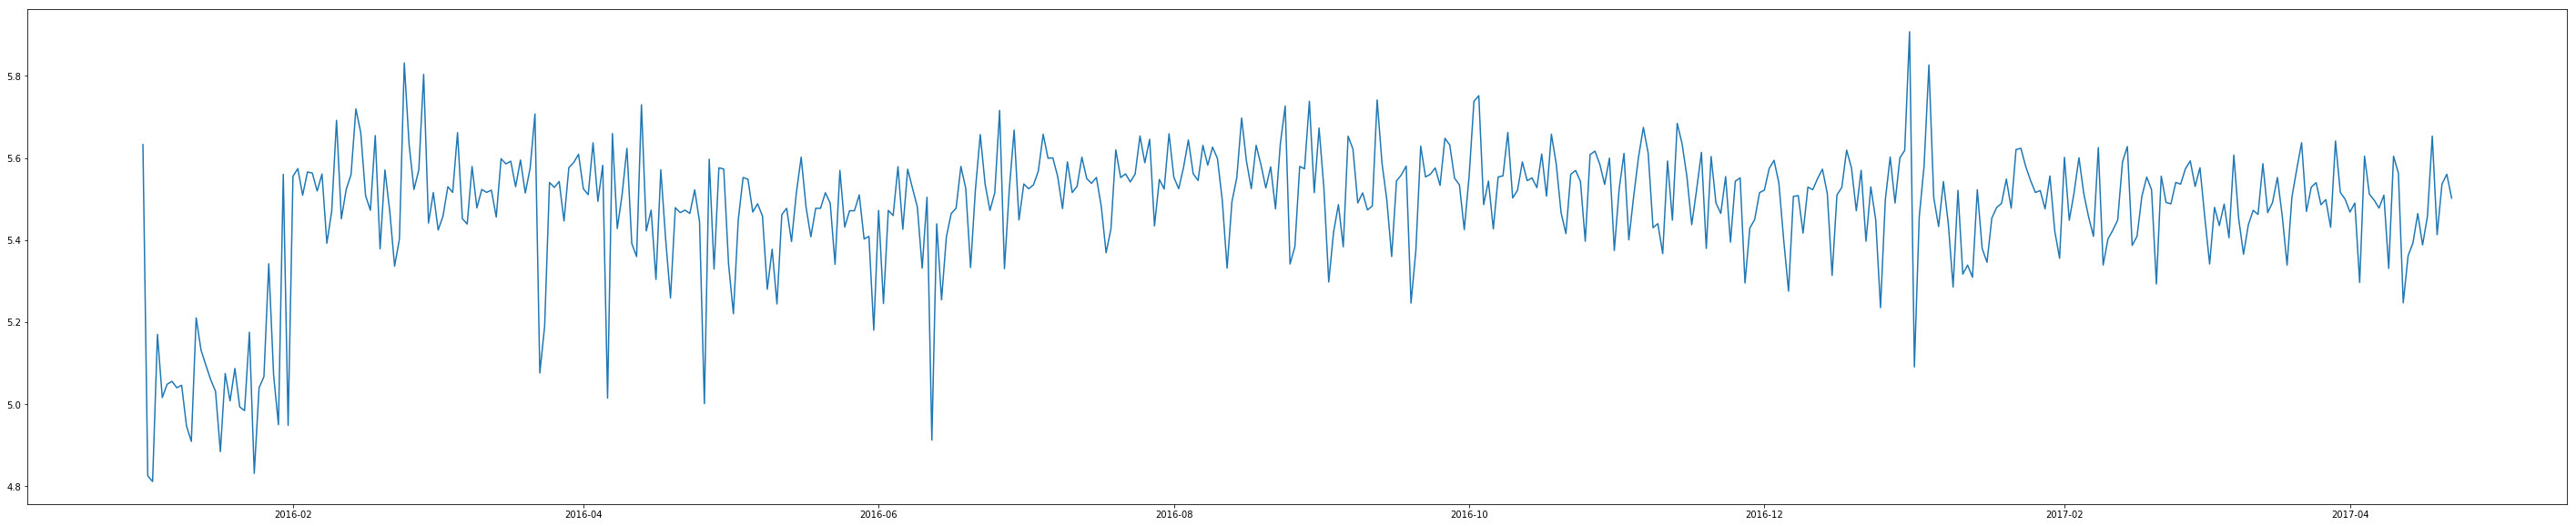

In [153]:
a['reserve_visitors']
plt.figure(figsize=(50, 10))
plt.plot(a.index,a['reserve_visitors'])

#  エアレジ登録店訪問客の平均値

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


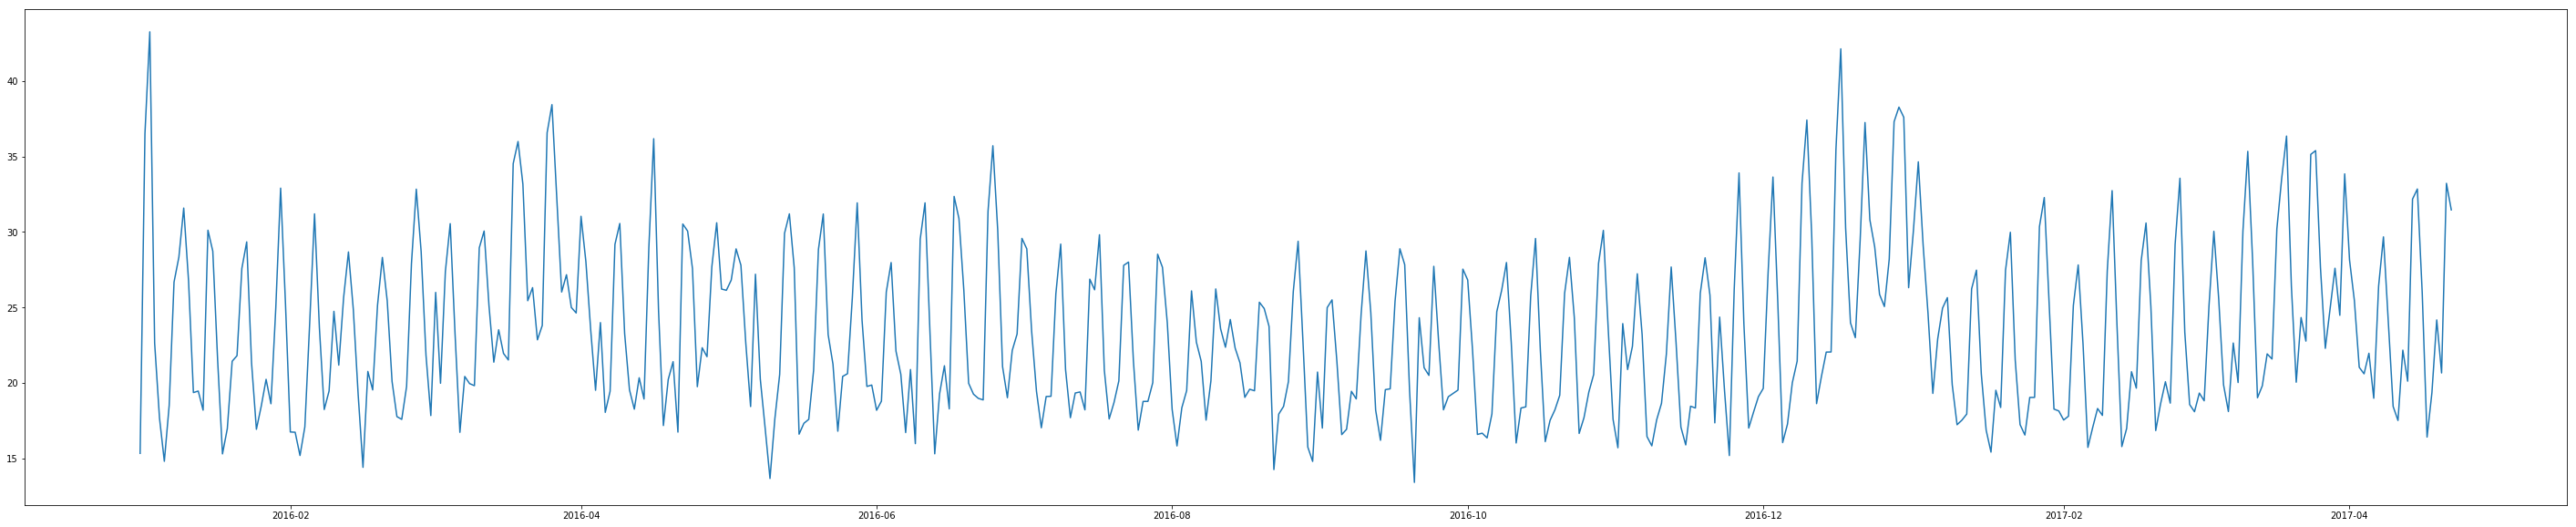

In [151]:
a['visitors']
plt.figure(figsize=(50, 10))
plt.plot(a.index,a['visitors'])

In [190]:
train['day_of_week'] = train['visit_date'].dt.dayofweek

In [163]:
train.groupby('day_of_week').mean()

,reserve_visitors,latitude,longitude,visitors
day_of_week,,,,
0,4.613109,36.516172,137.751037,19.646859
1,4.618309,36.363112,137.569615,20.039932
2,4.656895,36.298027,137.390963,23.200786
3,4.598391,36.319446,137.433213,22.264418
4,4.610391,36.367389,137.461606,30.853634
5,4.618996,36.366295,137.361413,32.566067
6,4.723957,36.256046,137.178844,26.192467


In [165]:
a = train.groupby('day_of_week').mean()

# 曜日、縦軸：全てのAirREGI登録店の来店数の平均値

<BarContainer object of 7 artists>

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


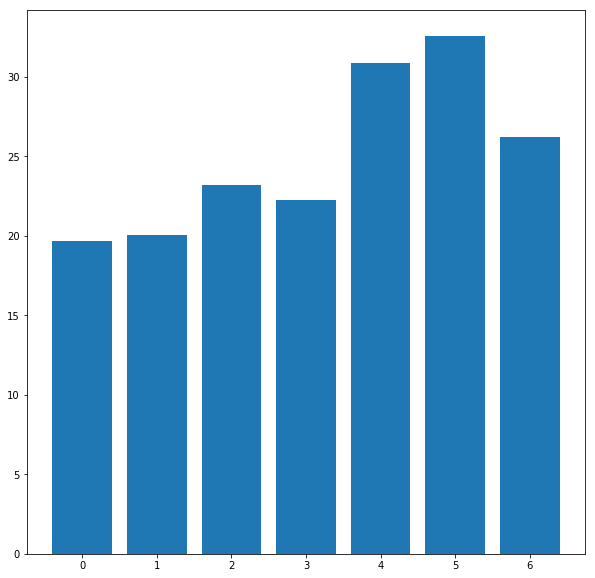

In [168]:
a.index
plt.figure(figsize=(10, 10))
plt.bar(a.index,a['visitors'])

# 金曜日、土曜日、日曜日に客が増加する傾向がある

In [169]:
train

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,visit_date,visitors,day_of_week
0,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-01,21,4
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-02,9,5
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-04,16,0
3,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-05,11,1
4,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-06,10,2
5,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-07,2,3
6,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-08,5,4
7,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-09,13,5
8,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,6
9,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-11,15,0


カラム名'calendar_date'を'visit_date'に変換してマージ

In [ ]:
　# holiday_flgが0か1か、縦軸：全てのAirREGI登録店の来店数の平均値

In [12]:
train.groupby('holiday_flg').mean().index

Int64Index([0, 1], dtype='int64', name='holiday_flg')

# 土日祝かどうか、縦軸：全てのAirREGI登録店の来店数の平均値

<BarContainer object of 2 artists>

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


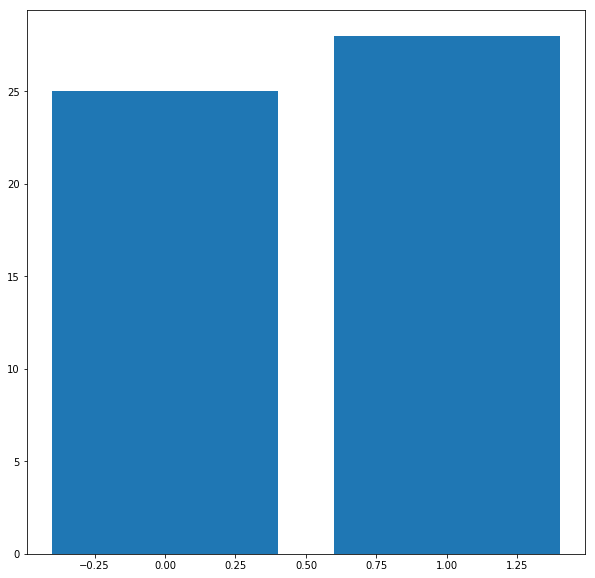

In [13]:
plt.figure(figsize=(10, 10))

plt.bar(train.groupby('holiday_flg').mean().index,train.groupby('holiday_flg').mean()['visitors'])

# holiday flagが土日も内包しているか確認

In [46]:
train[(train['holiday_flg']==0) & (train['day_of_week'] =='Sunday')]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,visit_date,visitors,day_of_week,holiday_flg
84272,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84273,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84274,air_db4b38ebe7a7ceff,2016-01-06 18:00:00,2016-01-06 17:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84275,air_db4b38ebe7a7ceff,2016-01-09 19:00:00,2016-01-09 16:00:00,2,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84276,air_db4b38ebe7a7ceff,2016-01-09 23:00:00,2016-01-09 23:00:00,1,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84277,air_db4b38ebe7a7ceff,2016-01-10 00:00:00,2016-01-09 21:00:00,1,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84278,air_db4b38ebe7a7ceff,2016-01-10 18:00:00,2016-01-10 17:00:00,5,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84279,air_db4b38ebe7a7ceff,2016-01-12 17:00:00,2016-01-12 17:00:00,9,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84280,air_db4b38ebe7a7ceff,2016-01-12 21:00:00,2016-01-12 21:00:00,1,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0
84281,air_db4b38ebe7a7ceff,2016-01-14 19:00:00,2016-01-14 17:00:00,2,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-10,21,Sunday,0


# holiday　flagは土日を内包していないことがわかるので、holiday　flag　が1かつ、土日を１くくりする

In [73]:
#土日or 祝日
(train['holiday_flg']==1)| (train['day_of_week'] =='Sunday') | (train['day_of_week'] =='Saturday')

0            True
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
11603572    False
11603573    False
11603574    False
11603575    False
11603576    False
11603577    False
11603578    False
11603579    False
11603580    False
11603581    False
11603582    False
11603583    False
11603584    False
11603585    False
11603586    False
11603587    False
11603588    False
11603589    False
11603590    False
11603591    False
11603592    False
11603593    False
11603594    False
11603595    False
11603596  

In [74]:
a = (train['holiday_flg']==1)| (train['day_of_week'] =='Sunday') | (train['day_of_week'] =='Saturday')

In [77]:
a = pd.DataFrame(a).rename(columns = {0:'all_holidays'})

In [87]:
mapping = {True:1,False:0}

In [82]:
(train['holiday_flg']==1)| (train['day_of_week'] =='Sunday') | (train['day_of_week'] =='Saturday')

0            True
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
11603572    False
11603573    False
11603574    False
11603575    False
11603576    False
11603577    False
11603578    False
11603579    False
11603580    False
11603581    False
11603582    False
11603583    False
11603584    False
11603585    False
11603586    False
11603587    False
11603588    False
11603589    False
11603590    False
11603591    False
11603592    False
11603593    False
11603594    False
11603595    False
11603596  

In [83]:
a

,all_holidays
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [84]:
a =  (train['holiday_flg']==1)| (train['day_of_week'] =='Sunday') | (train['day_of_week'] =='Saturday')

In [94]:
a = a.map(mapping)
a = pd.DataFrame(a)

In [97]:
a

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


#  土日祝日とそれ以外で値を振ることができた

In [101]:
train = pd.concat([train,a],axis=1).rename(columns={0:'all_holidays'})

In [105]:
 train.groupby('all_holidays').mean()

,reserve_visitors,latitude,longitude,visitors,holiday_flg
all_holidays,,,,,
0,4.616140,36.361552,137.523586,23.197506,0.000000
1,4.665319,36.341731,137.292285,29.417414,0.169702


# 土日祝かどうか、縦軸：全てのAirREGI登録店の来店数の平均値

<BarContainer object of 2 artists>

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


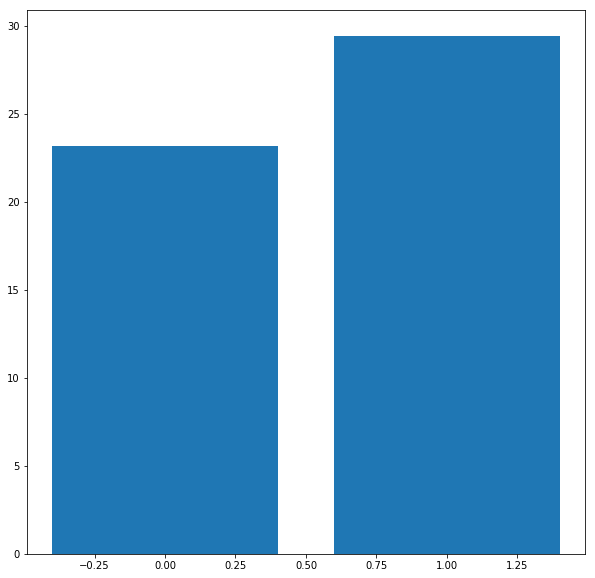

In [109]:
plt.figure(figsize=(10, 10))

plt.bar(train.groupby('all_holidays').mean().index,train.groupby('all_holidays').mean()['visitors'])

#  土日を含むと、より訪問数に乖離が生まれることがわかる

# AirREGI登録店のジャンル、縦軸：登録店数）

In [115]:
air_store_info.groupby('air_genre_name').count()

,air_store_id,air_area_name,latitude,longitude
air_genre_name,,,,
Asian,2,2,2,2
Bar/Cocktail,79,79,79,79
Cafe/Sweets,181,181,181,181
Creative cuisine,13,13,13,13
Dining bar,108,108,108,108
International cuisine,2,2,2,2
Italian/French,102,102,102,102
Izakaya,197,197,197,197
Japanese food,63,63,63,63


<BarContainer object of 14 artists>

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


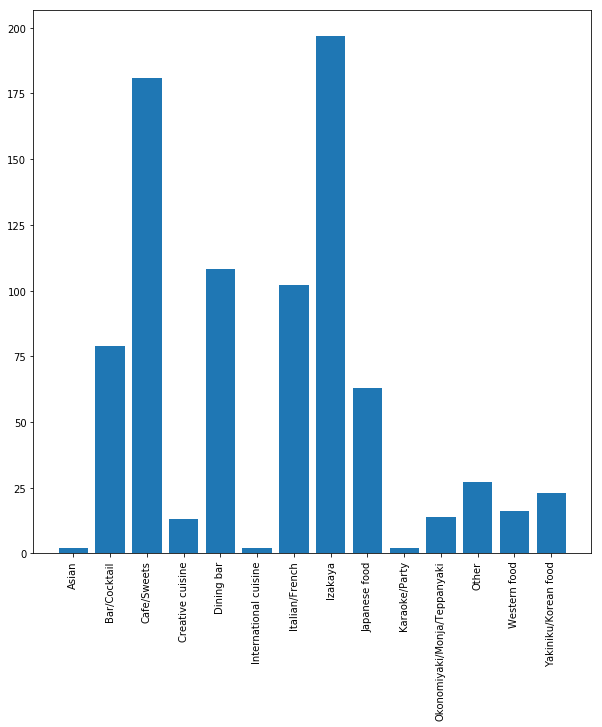

In [192]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.bar(air_store_info.groupby('air_genre_name').count().index,air_store_info.groupby('air_genre_name').count()['air_store_id'])

# AirREGI登録店の都道府県、縦軸：登録店数

In [117]:
air_store_info

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
5,air_99c3eae84130c1cb,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
6,air_f183a514cb8ff4fa,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
7,air_6b9fa44a9cf504a1,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
8,air_0919d54f0c9a24b8,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
9,air_2c6c79d597e48096,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


# Hokkaidō Sapporo-shi Minami 3 Jōnishiのように市町村の情報も入っていて、都道府県別に分けることができないので、都道府県名のみを残すように前処理

In [121]:
import re

In [122]:
moji = 'Hyōgo-ken'

In [123]:
 moji.split('-')[0]

'Hyōgo'

In [125]:
air_store_info['air_area_name'].map(lambda moji: moji.split('-')[0])

0                 Hyōgo
1                 Hyōgo
2                 Hyōgo
3                 Hyōgo
4                 Tōkyō
5                 Tōkyō
6                 Tōkyō
7                 Tōkyō
8                 Tōkyō
9                 Tōkyō
10                Tōkyō
11                Tōkyō
12                Tōkyō
13                Tōkyō
14                Tōkyō
15                Tōkyō
16                Tōkyō
17              Fukuoka
18              Fukuoka
19              Fukuoka
20              Fukuoka
21              Fukuoka
22              Fukuoka
23              Fukuoka
24              Fukuoka
25              Fukuoka
26                Tōkyō
27                Tōkyō
28                Tōkyō
29                Tōkyō
             ...       
799               Tōkyō
800               Tōkyō
801               Ōsaka
802               Ōsaka
803               Tōkyō
804               Tōkyō
805               Tōkyō
806               Tōkyō
807               Tōkyō
808               Tōkyō
809             

# 都道府県名のみが残っていることが確認できた

In [132]:
air_store_info['prefecture'] = air_store_info['air_area_name'].map(lambda moji: moji.split('-')[0])

In [135]:
air_store_info.groupby('prefecture').count()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
prefecture,,,,,
Fukuoka,127,127,127,127,127
Hiroshima,32,32,32,32,32
Hokkaidō Abashiri,2,2,2,2,2
Hokkaidō Asahikawa,13,13,13,13,13
Hokkaidō Katō,2,2,2,2,2
Hokkaidō Sapporo,29,29,29,29,29
Hyōgo,57,57,57,57,57
Miyagi,17,17,17,17,17
Niigata,14,14,14,14,14


# AirREGI登録店の都道府県、縦軸：登録店数

<BarContainer object of 12 artists>

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


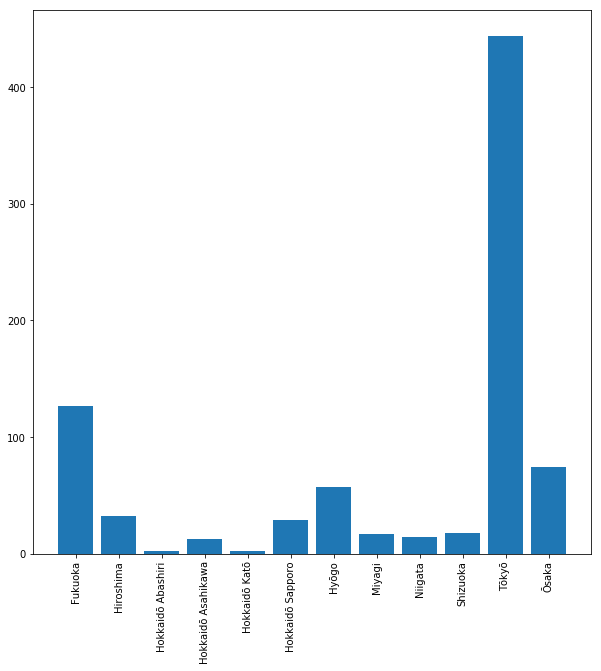

In [193]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.bar(air_store_info.groupby('prefecture').count().index,air_store_info.groupby('prefecture').count()['air_store_id'])

# とうky

# Hot Pepper GourmetとAirREGIの登録店舗数。重複が何店舗かの確認

In [138]:
store_id_relation

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7
5,air_a38f25e3399d1b25,hpg_50378da9ffb9b6cd
6,air_3c938075889fc059,hpg_349b1b92f98b175e
7,air_68301bcb11e2f389,hpg_2c09f3abb2220659
8,air_5f6fa1b897fe80d5,hpg_40aff6385800ebb1
9,air_00a91d42b08b08d9,hpg_fbe603376b5980fc


# First submiton

In [139]:
sub = pd.read_csv('sample_submission.csv')

In [168]:
# df_test
df_test = pd.read_csv('sample_submission.csv')
df_test['air_store_id'] = df_test['id'].apply(lambda x: '_'.join(x.split('_')[:2]))
df_test['visit_date'] = df_test['id'].apply(lambda x: x.split('_')[-1])
index_test = df_test['id']

In [169]:
df_test

,id,visitors,air_store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27
5,air_00a91d42b08b08d9_2017-04-28,0,air_00a91d42b08b08d9,2017-04-28
6,air_00a91d42b08b08d9_2017-04-29,0,air_00a91d42b08b08d9,2017-04-29
7,air_00a91d42b08b08d9_2017-04-30,0,air_00a91d42b08b08d9,2017-04-30
8,air_00a91d42b08b08d9_2017-05-01,0,air_00a91d42b08b08d9,2017-05-01
9,air_00a91d42b08b08d9_2017-05-02,0,air_00a91d42b08b08d9,2017-05-02


In [141]:
from sklearn.tree import DecisionTreeRegressor

In [142]:
tree = DecisionTreeRegressor()

In [143]:
train.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,visit_date,visitors,day_of_week,holiday_flg,all_holidays
0,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-01,21,Friday,1,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-01,21,Friday,1,1
2,air_db4b38ebe7a7ceff,2016-01-06 18:00:00,2016-01-06 17:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-01,21,Friday,1,1
3,air_db4b38ebe7a7ceff,2016-01-09 19:00:00,2016-01-09 16:00:00,2,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-01,21,Friday,1,1
4,air_db4b38ebe7a7ceff,2016-01-09 23:00:00,2016-01-09 23:00:00,1,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,2016-01-01,21,Friday,1,1


In [152]:
train.dtypes 

air_store_id                object
visit_datetime              object
reserve_datetime            object
reserve_visitors             int64
air_genre_name              object
air_area_name               object
latitude                   float64
longitude                  float64
hpg_store_id                object
visit_date          datetime64[ns]
visitors                     int64
day_of_week                 object
holiday_flg                  int64
all_holidays                 int64
dtype: object

In [157]:
num_i = []
for i in train.columns:
    if train[i].dtypes != object:
        num_i.append(i)

In [158]:
num_i

['reserve_visitors',
 'latitude',
 'longitude',
 'visit_date',
 'visitors',
 'holiday_flg',
 'all_holidays']

In [162]:
X =  train[num_i].drop(['visitors','visit_date'],axis=1)

In [163]:
y = train.visitors

In [164]:
tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [165]:
tree.predict(X)

array([22.58515399, 22.9794826 , 22.58515399, ..., 19.41117699,
        8.19962687, 12.71795159])

In [166]:
pred = tree.predict(X)

In [172]:
sample_submission = sub

In [184]:
#RMSLE
def mean_squared_logarithmic_error(y, p):
        l = lambda x: np.nan_to_num(np.log(x + 1))
        return np.sqrt(((l(p) - l(y))**2).mean())

In [174]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

In [175]:
from sklearn.model_selection import TimeSeriesSplit

# 時系列検証

In [176]:
tscv = TimeSeriesSplit(n_splits=5)

In [191]:
for train_index, val_index in tscv.split(X):
    tree = DecisionTreeRegressor()
    tree.fit(X.iloc[train_index],y.iloc[train_index])
    y_pred = tree.predict(X.iloc[val_index])
    print('RMSLE',mean_squared_logarithmic_error(y.iloc[val_index],y_pred))

RMSLE 0.7120794156230607
RMSLE 0.710615333411132
RMSLE 0.6998785962657476
RMSLE 0.6875790451218659
RMSLE 0.6833025862902462


#  今回の時系列データの予測にそぐうようなモデル（LSTM、RNN）を未学習なのでsubmissionせずに提出します。